In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Documents\\CountriesDATA.csv", decimal = ",")

In [10]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Development status
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN,0
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN,1


In [11]:
data.tail()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Development status
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,...,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630,0
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,...,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400,0
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,...,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393,0
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,...,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489,0
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,1900.0,90.7,...,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579,0


In [12]:
data.shape

(227, 21)

In [13]:
data.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Development status
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283,0.259912
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841,0.439555
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000,0.000000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250,0.000000
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000,0.000000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500,1.000000
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000,1.000000


In [14]:
data.nunique()

Country                               227
Region                                 11
Population                            227
Area (sq. mi.)                        226
Pop. Density (per sq. mi.)            219
Coastline (coast/area ratio)          151
Net migration                         157
Infant mortality (per 1000 births)    220
GDP ($ per capita)                    130
Literacy (%)                          140
Phones (per 1000)                     214
Arable (%)                            203
Crops (%)                             162
Other (%)                             209
Climate                                 6
Birthrate                             220
Deathrate                             201
Agriculture                           150
Industry                              155
Service                               167
Development status                      2
dtype: int64

In [15]:
data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
Development status                     0
dtype: int64

In [16]:
# view summary statistics in numerical variables

print(round(data.describe(),2))

         Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
count  2.270000e+02          227.00                      227.00   
mean   2.874028e+07       598226.96                      379.05   
std    1.178913e+08      1790282.24                     1660.19   
min    7.026000e+03            2.00                        0.00   
25%    4.376240e+05         4647.50                       29.15   
50%    4.786994e+06        86600.00                       78.80   
75%    1.749777e+07       441811.00                      190.15   
max    1.313974e+09     17075200.00                    16271.50   

       Coastline (coast/area ratio)  Net migration  \
count                        227.00         224.00   
mean                          21.17           0.04   
std                           72.29           4.89   
min                            0.00         -20.99   
25%                            0.10          -0.93   
50%                            0.73           0.00   
75%               

In [33]:
data= data[[ 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Birthrate', 'Deathrate',
       'Industry']]
data.head() 

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Birthrate,Deathrate,Industry
0,31056997,647500,48.0,23.06,163.07,700.0,36.0,3.2,46.60,20.34,0.240
1,3581655,28748,124.6,-4.93,21.52,4500.0,86.5,71.2,15.11,5.22,0.188
2,32930091,2381740,13.8,-0.39,31.00,6000.0,70.0,78.1,17.14,4.61,0.600
3,57794,199,290.4,-20.71,9.27,8000.0,97.0,259.5,22.46,3.27,NaN
4,71201,468,152.1,6.60,4.05,19000.0,100.0,497.2,8.71,6.25,NaN


In [34]:
data.columns

Index(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Birthrate',
       'Deathrate', 'Industry'],
      dtype='object')

In [35]:
print(data.dtypes)

Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Birthrate                             float64
Deathrate                             float64
Industry                              float64
dtype: object


In [36]:
newCorr = data.corr()

<Axes: >

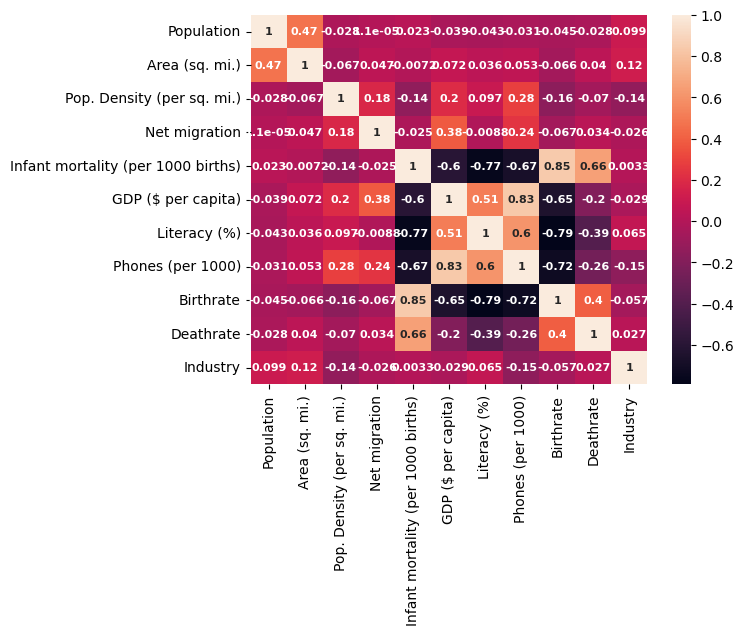

In [37]:
sns.heatmap(newCorr, xticklabels= newCorr.columns , yticklabels= newCorr.columns,annot=True, annot_kws={'fontsize':8 , 'fontweight': 'bold'})

In [68]:
median_value = data['GDP ($ per capita)'].median()
data['GDP ($ per capita)'].fillna(median_value,inplace=True)

In [69]:
x = data.drop(['GDP ($ per capita)'], axis=1)
y = data['GDP ($ per capita)']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 64)

In [71]:
x_train.shape, x_test.shape

((158, 10), (69, 10))

In [72]:
# check missing values in numerical variables in X_train
x_train.isnull().sum()

Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Net migration                          3
Infant mortality (per 1000 births)     3
Literacy (%)                          13
Phones (per 1000)                      3
Birthrate                              2
Deathrate                              3
Industry                              13
dtype: int64

In [73]:
x_test.isnull().sum()

Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Net migration                         0
Infant mortality (per 1000 births)    0
Literacy (%)                          5
Phones (per 1000)                     1
Birthrate                             1
Deathrate                             1
Industry                              3
dtype: int64

In [74]:
# print percentage of missing values in the numerical variables in training set
for col in x_train.columns:
    if x_train[col].isnull().mean()>0:
        print(col, round(x_train[col].isnull().mean(),4))

Net migration 0.019
Infant mortality (per 1000 births) 0.019
Literacy (%) 0.0823
Phones (per 1000) 0.019
Birthrate 0.0127
Deathrate 0.019
Industry 0.0823


In [75]:
# impute missing values in X_train and X_test with respective column median in X_train
for df1 in [x_train, x_test]:
    for col in x_train.columns:
        col_median=x_train[col].median()
        df1[col].fillna(col_median, inplace=True) 

In [76]:
# check again missing values in numerical variables in X_train
x_train.isnull().sum()

Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Net migration                         0
Infant mortality (per 1000 births)    0
Literacy (%)                          0
Phones (per 1000)                     0
Birthrate                             0
Deathrate                             0
Industry                              0
dtype: int64

In [77]:
# check missing values in numerical variables in X_test
x_test.isnull().sum()

Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Net migration                         0
Infant mortality (per 1000 births)    0
Literacy (%)                          0
Phones (per 1000)                     0
Birthrate                             0
Deathrate                             0
Industry                              0
dtype: int64

In [78]:
median_value = data['GDP ($ per capita)'].median()
data['GDP ($ per capita)'].fillna(median_value,inplace=True)

In [79]:
print(data['GDP ($ per capita)'].isnull().sum())

0


In [80]:
y_test.isnull().sum()

0

In [81]:
y_train.isnull().sum()

0

In [82]:
knn = KNeighborsClassifier(n_neighbors=1)

In [83]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [84]:
prediction = knn.predict(x_test)

In [85]:
prediction

array([  800.,  1400.,  2000.,  1900., 17500.,  7800., 37800., 19000.,
        6900., 27400., 18000., 10600., 18600., 19000.,  4000., 31100.,
        4900., 16000.,  3500.,  2000.,   800.,  2000.,   800., 28800.,
       21000., 30000., 37800., 16900.,  3000.,   800.,  3000.,  1700.,
       27400.,  2600., 19800., 31100.,  5400.,  1200., 55100.,  2500.,
       19800.,  1800.,  2600.,  4000., 16800.,   800.,  3500., 25000.,
         500., 11400., 11400.,  9100., 19000.,  3900.,  1400., 12300.,
        1400., 27600.,   900.,  9100.,  3500.,  6900.,  1100., 28600.,
        6000.,  1700., 16900.,  1300.,  4600.])

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test , prediction)) 

              precision    recall  f1-score   support

       500.0       0.00      0.00      0.00         1
       600.0       0.00      0.00      0.00         2
       700.0       0.00      0.00      0.00         1
       800.0       0.00      0.00      0.00         2
       900.0       0.00      0.00      0.00         0
      1000.0       0.00      0.00      0.00         1
      1100.0       0.00      0.00      0.00         0
      1200.0       0.00      0.00      0.00         0
      1300.0       0.00      0.00      0.00         2
      1400.0       0.00      0.00      0.00         0
      1500.0       0.00      0.00      0.00         2
      1600.0       0.00      0.00      0.00         2
      1700.0       0.00      0.00      0.00         1
      1800.0       1.00      0.33      0.50         3
      1900.0       0.00      0.00      0.00         1
      2000.0       0.00      0.00      0.00         0
      2200.0       0.00      0.00      0.00         3
      2300.0       0.00    

C:\Users\HP\anaconda3\envs\khushi\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\khushi\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\khushi\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\khushi\li

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)

In [89]:
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

True Positives(TP) =  0

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  0


In [94]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_scores=[]
for k in range(1, 51):
    # Create KNN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn.fit(x_train, y_train)
    
    # Predict the labels for the test set
    prediction = knn.predict(x_test)
    
    # Calculate accuracy for the current value of k
    accuracy = accuracy_score(y_test, prediction)
    
    # Append the accuracy score to the list
    accuracy_scores.append((k, accuracy))

# Print the accuracy scores for each value of k
for k, accuracy in accuracy_scores:
    print("k =", k, ", Accuracy =", accuracy)

k = 1 , Accuracy = 0.014492753623188406
k = 2 , Accuracy = 0.014492753623188406
k = 3 , Accuracy = 0.0
k = 4 , Accuracy = 0.0
k = 5 , Accuracy = 0.0
k = 6 , Accuracy = 0.028985507246376812
k = 7 , Accuracy = 0.043478260869565216
k = 8 , Accuracy = 0.043478260869565216
k = 9 , Accuracy = 0.043478260869565216
k = 10 , Accuracy = 0.043478260869565216
k = 11 , Accuracy = 0.043478260869565216
k = 12 , Accuracy = 0.028985507246376812
k = 13 , Accuracy = 0.028985507246376812
k = 14 , Accuracy = 0.028985507246376812
k = 15 , Accuracy = 0.028985507246376812
k = 16 , Accuracy = 0.028985507246376812
k = 17 , Accuracy = 0.028985507246376812
k = 18 , Accuracy = 0.028985507246376812
k = 19 , Accuracy = 0.014492753623188406
k = 20 , Accuracy = 0.014492753623188406
k = 21 , Accuracy = 0.014492753623188406
k = 22 , Accuracy = 0.014492753623188406
k = 23 , Accuracy = 0.014492753623188406
k = 24 , Accuracy = 0.014492753623188406
k = 25 , Accuracy = 0.014492753623188406
k = 26 , Accuracy = 0.0144927536231